In [1]:
import pandas as pd
import tqdm

In [2]:
cities = pd.read_csv('DS/cities.csv')
districts = pd.read_csv('DS/districts.csv')
train = pd.read_csv('DS/train.csv')
# test = pd.read_csv('DS/test.csv')

In [3]:
cities = cities.rename(columns={'id': 'city_id'})
districts = districts.rename(columns={'id': 'district_id'})

In [4]:
intermediate = pd.merge(train, districts, left_on='district_id', right_on='district_id', how='left')
train = pd.merge(intermediate, cities, left_on='city_id', right_on='city_id', suffixes=['_district', '_city'])

# intermediate = pd.merge(test, districts, left_on='district_id', right_on='district_id', how='left')
# test = pd.merge(intermediate, cities, left_on='city_id', right_on='city_id', suffixes=['_district', '_city'])

In [5]:
train = train[train['name_pl_city'] == 'Warszawa'][(train['name_pl_district'] == 'Mokotów') | (train['name_pl_district'] == 'Śródmieście') | (train['name_pl_district'] == 'Ochota') | (train['name_pl_district'] == 'Wola')]
train = train.reset_index().drop(columns=['index'])

/tmp/ipykernel_44969/1836881820.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = train[train['name_pl_city'] == 'Warszawa'][(train['name_pl_district'] == 'Mokotów') | (train['name_pl_district'] == 'Śródmieście') | (train['name_pl_district'] == 'Ochota') | (train['name_pl_district'] == 'Wola')]


In [6]:
def parse_params(params):
    result = {}
    params = params.split('<br>')

    for p in params:
        kv = p.split('<=>')
        if len(kv) >= 2:
            key, value = p.split('<=>')
            result[key] = value

    return result

In [7]:
train = train.join(pd.DataFrame([parse_params(train.at[idx, 'params']) for idx in tqdm.tqdm(range(len(train)))]))

100%|██████████| 47829/47829 [00:00<00:00, 60459.89it/s]


In [8]:
def preprocess_columns(types_columns):
    gather = []
    sz = len(types_columns[0][0])
    for row_idx in range(sz):
        result = {}
        for column, cname in types_columns:
            if type(column[row_idx]) == str and column[row_idx] != '' and column[row_idx] != '0':
                values = column[row_idx].split('<->')
                if len(values) > 0:
                    for v in values:
                        result[f"{cname}_{v}"] = 1
        gather.append(result)
    return gather

In [9]:
train = train.join(pd.DataFrame(preprocess_columns([(train[col], col) for col in train.columns if col.endswith('_types')])))

In [10]:
train = train.drop(columns=['id', 'district_id', 'city_id', 'region_id', 'description', 'params', *[col for col in train.columns if col.endswith('_types')]])

In [11]:
train

,created_at_first,category,is_business,title,price,name_pl_district,lon_district,lat_district,name_pl_city,lon_city,...,heating_types_heat_pump,extras_types_elevator,extras_types_heating,use_types_office,media_types_water_purification,fence_types_hedge,heating_types_stove,extras_types_pool,access_types_dirt,extras_types_asphalt_access
0,2019-03-15 12:46:35,Mieszkanie na sprzedaż,0,"Bezposrednio 73m2+Taras+Garaz, Swiezo Wykonczone",920000,Mokotów,21.01715,52.19832,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-06 14:40:45,Mieszkanie na sprzedaż,1,"Wyjątkowe mieszkanie w kamienicy, Stare Miasto.",730000,Śródmieście,21.01900,52.23313,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-29 17:33:07,Mieszkanie na sprzedaż,1,NaN,1362538,Mokotów,21.01715,52.19832,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-27 12:12:11,Mieszkanie na sprzedaż,1,Przytulne mieszkanie z MOŻLIWOŚCIĄ PODZIAŁU!!,325000,Wola,20.95718,52.23338,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-31 23:12:05,Mieszkanie na sprzedaż,1,Lux Apartament w kamienicy niedaleko metra Pol...,508000,Mokotów,21.01715,52.19832,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47824,2018-10-10 14:34:47,Mieszkanie na sprzedaż,1,"Muranów, Edelmana, 2 pokoje, 50m2, balkon, ciche",549000,Śródmieście,21.01900,52.23313,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47825,2018-02-24 19:00:54,Mieszkanie na sprzedaż,1,Pl. Konstytucji * Metro * kamienica z balkonem,659000,Śródmieście,21.01900,52.23313,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47826,2018-04-03 16:06:06,Mieszkanie na sprzedaż,1,"Ostatnie 3pok. mieszkanie 66m2, balkon na PATIO!",557000,Wola,20.95718,52.23338,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47827,2018-09-24 19:31:20,Mieszkanie na sprzedaż,1,"Mokotów, Al. Wilanowska, 3 pok., 94 m2, garaż",900000,Mokotów,21.01715,52.19832,Warszawa,21.00817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import datetime

def parse_created_at_first(dates):
    gather = []
    for d in dates:
        res = {}
        parsed = datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S")
        res['created_at_first_year'] = parsed.year
        res['created_at_first_month'] = parsed.month
        res['created_at_first_day'] = parsed.day
        res['created_at_first_hour'] = parsed.hour
        res['created_at_first_minute'] = parsed.minute
        gather.append(res)
    return gather

def parse_free_from(dates):
    gather = []
    for d in dates:
        res = {}
        if d != '' and type(d) == str:
            parsed = datetime.datetime.strptime(d, "%Y-%m-%d")
            res['free_from_year'] = parsed.year
            res['free_from_month'] = parsed.month
            res['free_from_day'] = parsed.day
        gather.append(res)
    return gather

In [13]:
train = train.join(pd.DataFrame(parse_free_from(train['free_from']))).join(pd.DataFrame(parse_created_at_first(train['created_at_first'])))

In [14]:
train = train.drop(columns=['created_at_first', 'free_from'])

In [15]:
train = train.drop(columns=['title'])

In [16]:
set(train['price[currency]'])
train = train.drop(columns=['price[currency]'])

In [17]:
train = train.drop(columns=['lon_district', 'lat_district', 'name_pl_city', 'lon_city', 'lat_city'])

In [18]:
import numpy as np
train.loc[train['building_floors_num'] == '', 'building_floors_num'] = np.nan

In [19]:
train.loc[train['build_year'] == '', 'build_year'] = np.nan

In [20]:
train.loc[train['rent'] == '', 'rent'] = np.nan

In [21]:
train = train.drop(columns='rent[currency]')

In [22]:
train['m'] = train['m'].astype(float)

In [23]:
train.loc[train['terrain_area'] == '', 'terrain_area'] = np.nan
train['terrain_area'] = train['terrain_area'].astype(float)

In [24]:
train = train.drop(columns=['rent'])

In [25]:
factorizations = {}
categorical = ['category', 'name_pl_district', 'market', 'building_type', 'floor_no', 'building_material',
            'windows_type', 'heating', 'construction_status', 'building_ownership', 'floors_num',
            'garret_type', 'roof_type', 'roofing', 'location', 'recreational', 'is_bungalow', 'rooms_num', 'building_floors_num', 'build_year']
for col in categorical:
    print(pd.factorize(train[col])[1])
    train[col] = pd.factorize(train[col])[0]

Index(['Mieszkanie na sprzedaż', 'Dom na sprzedaż'], dtype='object')
Index(['Mokotów', 'Śródmieście', 'Wola', 'Ochota'], dtype='object')
Index(['secondary', 'primary'], dtype='object')
Index(['block', 'tenement', '', 'apartment', 'ribbon', 'detached', 'house',
       'loft', 'semi_detached', 'infill', 'tenement_house', 'residence'],
      dtype='object')
Index(['floor_1', 'floor_4', 'floor_5', 'floor_2', 'floor_3',
       'floor_higher_10', 'floor_6', 'floor_8', 'floor_7', 'floor_10',
       'floor_9', 'ground_floor', '', 'garret', 'cellar'],
      dtype='object')
Index(['brick', '', 'other', 'concrete_plate', 'reinforced_concrete',
       'silikat', 'concrete', 'breezeblock', 'wood', 'cellular_concrete',
       'hydroton'],
      dtype='object')
Index(['wooden', 'plastic', '', 'aluminium'], dtype='object')
Index(['', 'urban', 'boiler_room', 'gas', 'other', 'electrical'], dtype='object')
Index(['ready_to_use', '', 'to_completion', 'to_renovation',
       'unfinished_close'],
      dtyp

In [26]:
train['m']

0         73.00
1         55.00
2        117.93
3         32.99
4         39.00
          ...  
47824     50.03
47825     58.00
47826     66.15
47827     94.00
47828     60.00
Name: m, Length: 47829, dtype: float64

In [45]:
import lightgbm as lgb

train_data = lgb.Dataset(train.drop(columns=['price']), label=train['price'])#, categorical_feature=categorical)
res = lgb.train({}, train_data)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 47829, number of used features: 75
[LightGBM] [Info] Start training from score 732133.085492


In [46]:
res

In [28]:
train

,category,is_business,price,name_pl_district,m,rooms_num,market,building_type,floor_no,building_floors_num,...,access_types_dirt,extras_types_asphalt_access,free_from_year,free_from_month,free_from_day,created_at_first_year,created_at_first_month,created_at_first_day,created_at_first_hour,created_at_first_minute
0,0,0,920000,0,73.00,0,0,0,0,0,...,NaN,NaN,2019.0,3.0,15.0,2019,3,15,12,46
1,0,1,730000,1,55.00,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,2018,6,6,14,40
2,0,1,1362538,0,117.93,1,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,2018,10,29,17,33
3,0,1,325000,2,32.99,2,1,0,2,0,...,NaN,NaN,NaN,NaN,NaN,2019,2,27,12,12
4,0,1,508000,0,39.00,0,0,1,3,1,...,NaN,NaN,2019.0,3.0,4.0,2019,1,31,23,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47824,0,1,549000,1,50.03,3,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,2018,10,10,14,34
47825,0,1,659000,1,58.00,4,0,1,1,13,...,NaN,NaN,NaN,NaN,NaN,2018,2,24,19,0
47826,0,1,557000,2,66.15,0,1,3,4,3,...,NaN,NaN,NaN,NaN,NaN,2018,4,3,16,6
47827,0,1,900000,0,94.00,0,0,0,0,6,...,NaN,NaN,NaN,NaN,NaN,2018,9,24,19,31


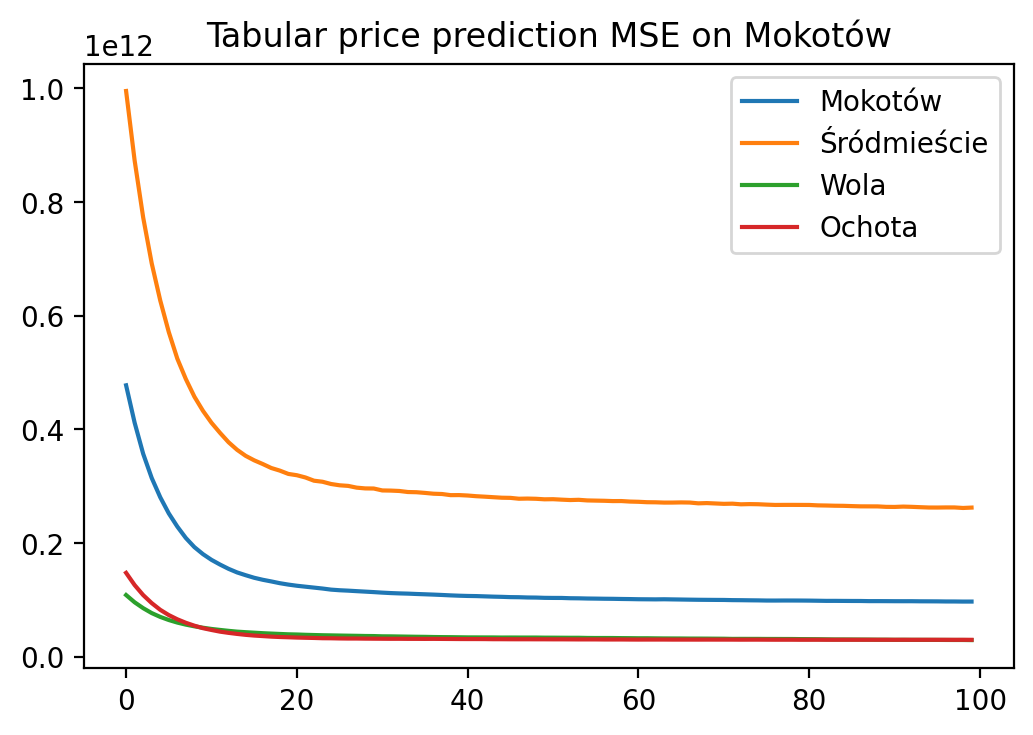

In [43]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 200
plt.plot(results[0]['l2-mean'])
plt.plot(results[1]['l2-mean'])
plt.plot(results[2]['l2-mean'])
plt.plot(results[3]['l2-mean'])
plt.title('Tabular price prediction MSE on Mokotów')
plt.legend(['Mokotów', 'Śródmieście', 'Wola', 'Ochota'])
plt.show()

In [30]:
# Loss na każdej z dzielnic
# variable importance
# variable importance

In [48]:

import dalex as dx
exp = dx.Explainer(res, train.drop(columns=['price']), train['price'])

Preparation of a new explainer is initiated

  -> data              : 47829 rows 89 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 47829 values
  -> model_class       : lightgbm.basic.Booster (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7fa0e8da7790> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.01e+05, mean = 7.32e+05, max = 1.83e+07
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.22e+06, mean = -1.07e-05, max = 1.31e+07
  -> model_info        : package lightgbm

A new explainer has been created!


In [49]:
vi = exp.model_parts()
vi.result

,variable,dropout_loss,label
0,roof_type,204621.981208,Booster
1,fence_types_other,204657.007186,Booster
2,heating_types_urban,204668.009076,Booster
3,is_business,204676.512762,Booster
4,fence_types_wooden,204677.052816,Booster
...,...,...,...
86,windows_type,246604.867920,Booster
87,building_floors_num,265970.635441,Booster
88,name_pl_district,269163.244860,Booster
89,m,849281.887344,Booster


In [52]:
vi.plot(max_vars=20)